In [ ]:
#@title
!pip install pythainlp
!pip install deepcut
!pip install emoji

## **Thai army IO twitter data analysis**


In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import date
import datetime

import re
import nltk
import deepcut
import emoji
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator


In [13]:
front = '/content/drive/My Drive/datasets/front/THSarabunNew.ttf'
IO_tweet = pd.read_csv('/content/drive/My Drive/datasets/IO twitter/thailand_092020_tweets_csv_hashed.csv', encoding='utf-8')
IO_user = pd.read_csv('/content/drive/My Drive/datasets/IO twitter/thailand_092020_users_csv_hashed.csv', encoding='utf-8')

th_stop = tuple(thai_stopwords())
mpl.font_manager.fontManager.addfont(front)
mpl.rc('font', family='TH Sarabun New', size=20)

In [14]:
IO_tweet.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1196659470232772609,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,NaN,NaN,NaN,0,3,2019-11-05,en,th,กกต.จี้“อนาคตใหม่”แจงเงินกู้“ธนาธร” https://t....,2019-11-19 05:20,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,1,[],['https://www.thansettakij.com/content/politic...,[]
1,1197369086662987776,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,tGpRofwHLXI5iuye+ZDKVW8yVCic9mkRLxTwiBbEOrU=,NaN,NaN,NaN,0,3,2019-11-05,en,th,ตายสนิท!'อิศรา'เปิดภ.ง.ด.91ปี61'คุณช่อ'แจ้งราย...,2019-11-21 04:20,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,0,[],['https://www.thaipost.net/main/detail/49119?f...,[]
2,1195602319892594693,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,hfg2zB3w3Ms2yTAnnRWD3XtVmgsIhmP+FKfELGctzU=,NaN,ก็ไม่มีรัยมากนะ,NaN,0,3,2019-11-05,th,und,Let's Get It : ชีวิตติดใบแดง CD กันต์ธีร์ EP....,2019-11-16 07:19,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,1,0,0,0,[],['https://youtu.be/3PL1_B6hGt4'],['10228272']
3,1204279208513392641,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,lktnIU8UKhYmk56OS2jEPjVTNidDUUnlrlDQCMRsPUA=,NaN,NaN,NaN,17,38,2019-10-01,th,th,อ้าวเฮ้ย ไม่เหมือนที่คุยกันไว้นี่หว่า...อุตส่า...,2019-12-10 05:58,Twitter Web App,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0,0,0,0,[],['https://m.youtube.com/watch?v=zTOfftM62fQ&fe...,[]
4,1227886730948169729,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,AY56F7lcfIPCx1p6y5EFqbfw3CfIBpQLhW6oVmcI7og=,NaN,NaN,NaN,5,42,2020-01-14,th,th,เป้นกำลังใจให้นะท่าน,2020-02-13 09:26,Twitter Web App,NaN,NaN,1.226497e+18,False,NaN,NaN,absent,absent,0,0,0,0,[],[],[]


In [15]:
IO_user.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,vhWtzcFy+XfbYd9IsXBhcnTpinSnq2Kk0DNa7LHaMF8=,NaN,NaN,NaN,0,0,2019-12-08,en
1,4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=,NaN,เออว่ะ,NaN,0,9,2020-01-14,en
2,oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,oWcI1PuaMbdZ4nfIREa7ZojYaIKL6tAyWha+EpCqqKQ=,NaN,ตระกร้อ,NaN,0,2,2019-12-09,en
3,eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=,NaN,NaN,NaN,0,3,2020-01-14,th
4,ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=,NaN,NaN,NaN,0,1,2019-12-08,en


In [16]:
from datetime import datetime
IO_tweet['tweet_date'] = pd.to_datetime(IO_tweet['tweet_time'])
IO_user['account_creation_date'] = pd.to_datetime(IO_user['account_creation_date'])

## User

In [17]:
mask = (IO_user['account_creation_date'] > '2017-1-1') & (IO_user['account_creation_date'] <= '2020-5-1')
IO_user_index = IO_user.loc[mask]
user_date_count = IO_user_index['account_creation_date'].dt.date.value_counts()

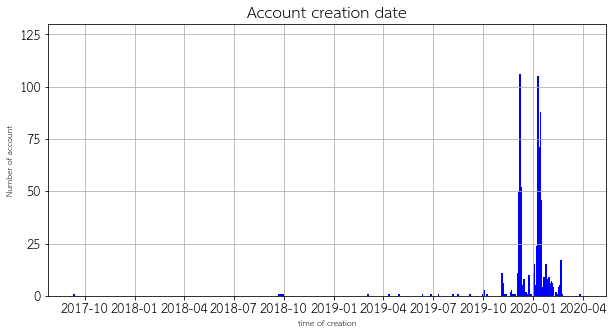

In [42]:

fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_date_count.index, list(user_date_count.values), color = 'b', width=3)
ax.set_ylabel('Number of account', fontsize=12)
ax.set_xlabel('time of creation', fontsize=12)
ax.set_title("Account creation date")
ax.set(ylim=(0, 130))
plt.show()


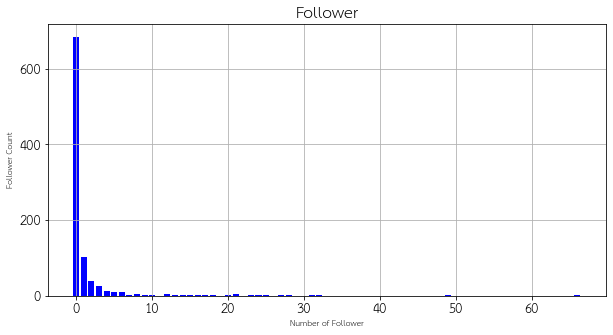

In [19]:
user_follwer = IO_user.follower_count.value_counts()
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_follwer.index, list(user_follwer.values), color = 'b')
ax.set_ylabel('Follower Count', fontsize=12)
ax.set_xlabel('Number of Follower', fontsize=12)
ax.set_title("Follower")

plt.show()

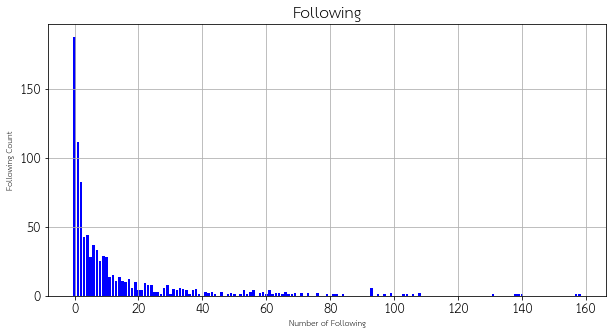

In [20]:
user_follwer = IO_user.following_count.value_counts()
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(user_follwer.index, list(user_follwer.values), color = 'b')
ax.set_ylabel('Following Count', fontsize=12)
ax.set_xlabel('Number of Following', fontsize=12)
ax.set_title("Following")

plt.show()

### **Tweet**

In [21]:
year = [2015, 2016, 2017, 2018]
for i in year:
  IO_tweet = IO_tweet.drop(IO_tweet[IO_tweet['tweet_date'].dt.year.values == [i]].index)

korat_shoting = date(year=2020, month=2, day=9)
FFP_dissolved = date(year=2020, month=2, day=21)
Flash_Mob = date(year=2020, month=2, day=25)

In [22]:

mask = (IO_tweet['tweet_date'] > '2019-10-1') & (IO_tweet['tweet_date'] <= '2020-4-1')
IO_index = IO_tweet.loc[mask]
tweet_date_count = IO_index['tweet_date'].dt.date.value_counts()


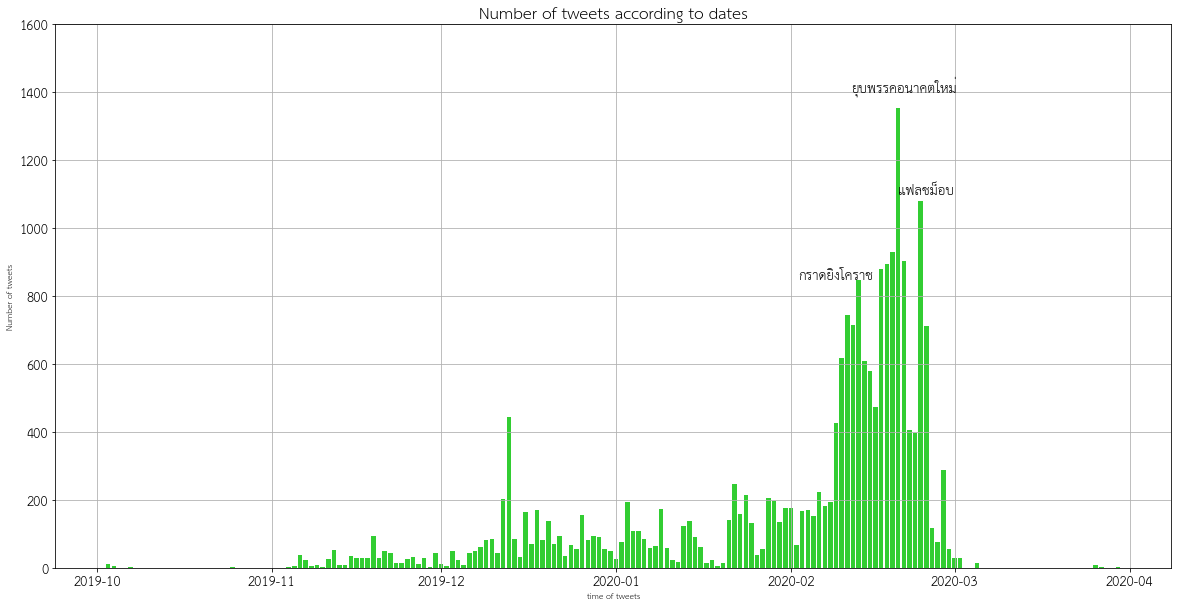

In [23]:

fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(tweet_date_count.index, list(tweet_date_count.values), color = 'limegreen')
ax.set_ylabel('Number of tweets', fontsize=12)
ax.set_xlabel('time of tweets', fontsize=12)
ax.set_title("Number of tweets according to dates")
ax.set(ylim=(0, 1600))
ax.text(korat_shoting, 850 , 'กราดยิงโคราช', fontsize=20, ha='center')
ax.text(FFP_dissolved, 1400 , 'ยุบพรรคอนาคตใหม่', fontsize=20, ha='center')
ax.text(Flash_Mob, 1100 , 'แฟลชม็อบ', fontsize=20, ha='center')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


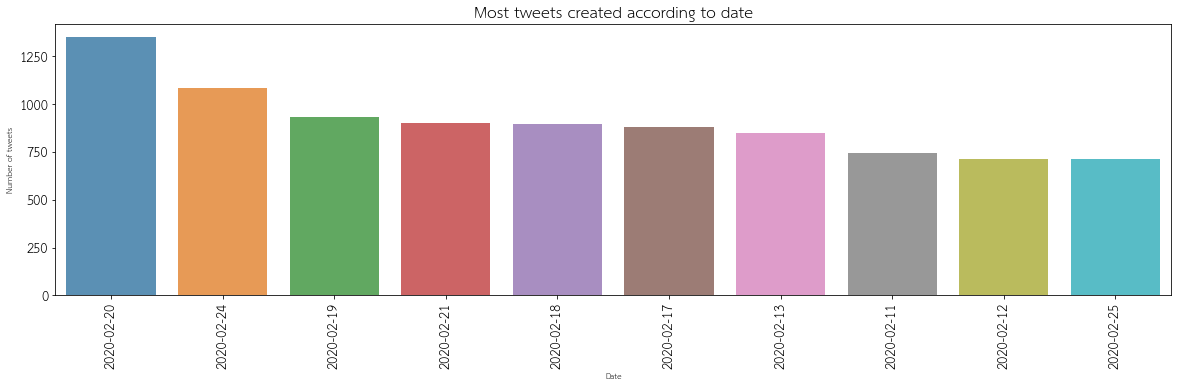

In [24]:
count_  = IO_tweet['tweet_date'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(20,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Most tweets created according to date')
plt.xticks(rotation='vertical')
plt.ylabel('Number of tweets', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

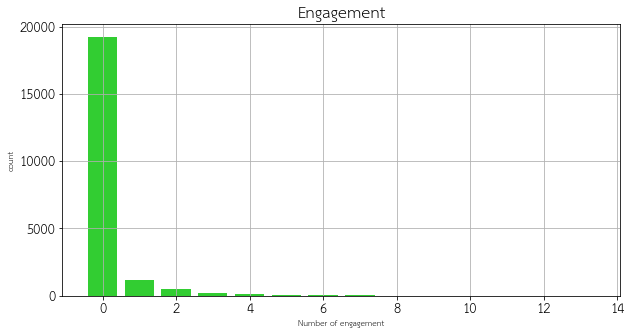

In [43]:
IO_tweet['engage'] = IO_tweet[['reply_count', 'like_count', 'retweet_count']].sum(axis=1)
engage = IO_tweet['engage'].value_counts()
engage = engage[engage.values != 1]
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.grid()
ax.bar(engage.index, list(engage.values), color = 'limegreen')
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('Number of engagement', fontsize=12)
ax.set_title("Engagement")
plt.show()

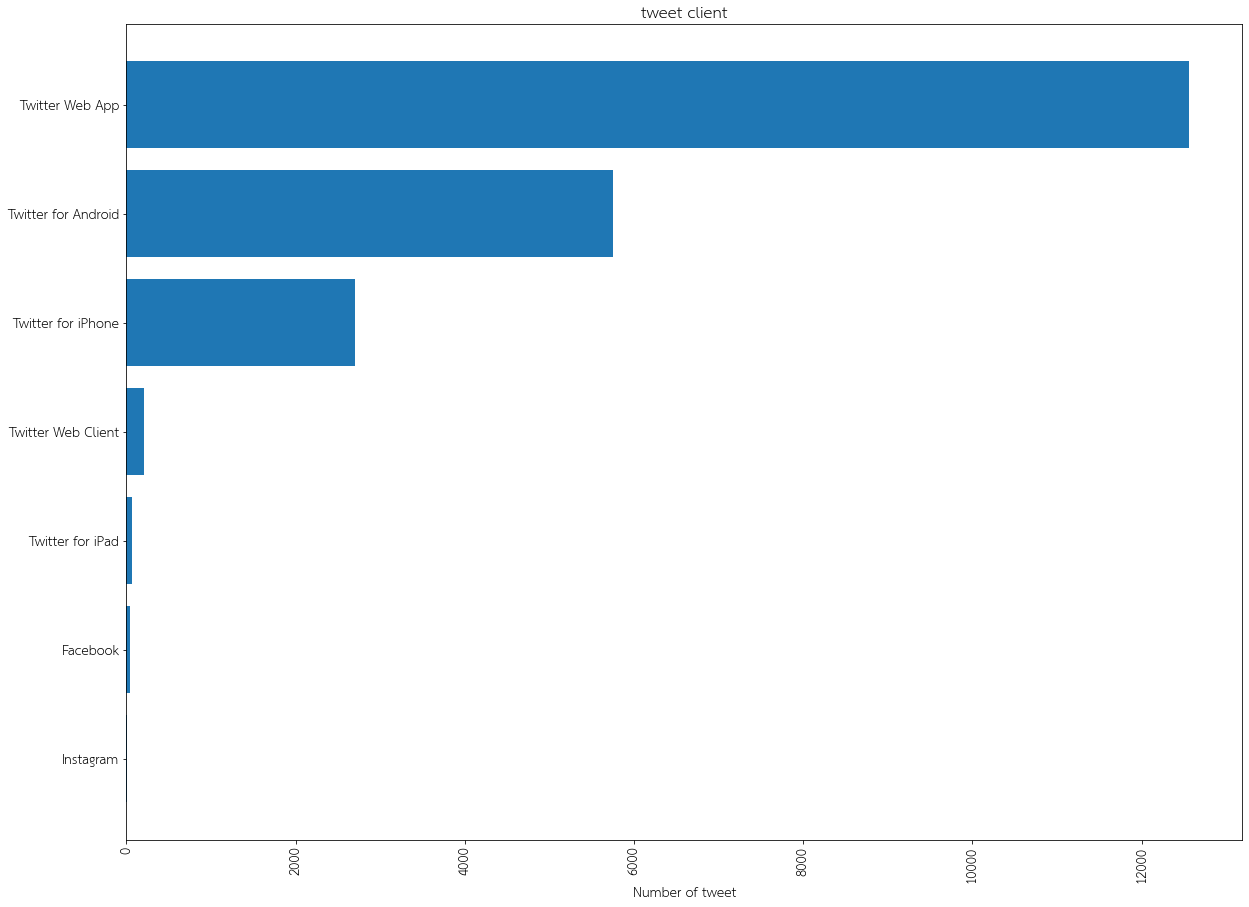

In [59]:
IO_tweet.tweet_client_name.value_counts()
tweet_client = IO_tweet.tweet_client_name.value_counts()
client_word = pd.DataFrame(data = tweet_client)
client_word = client_word.iloc[:7].sort_values(by='tweet_client_name')

plt.figure(figsize=(20,15))
plt.barh(client_word.index, client_word.tweet_client_name)
plt.title('tweet client')
plt.xlabel('Number of tweet')
plt.xticks(rotation='vertical')
plt.show()

## **Mention**


In [26]:
mention = []
for index, s in IO_tweet.tweet_text.iteritems():
    result = re.findall("\s([@][\w_-]+)", s)
    mention.append(','.join(result))


In [27]:
IO_tweet['mention'] = IO_tweet.tweet_text.str.findall(r'@([^\s:]+)').apply(','.join)
mention = IO_tweet[IO_tweet['mention'] != '']['mention']

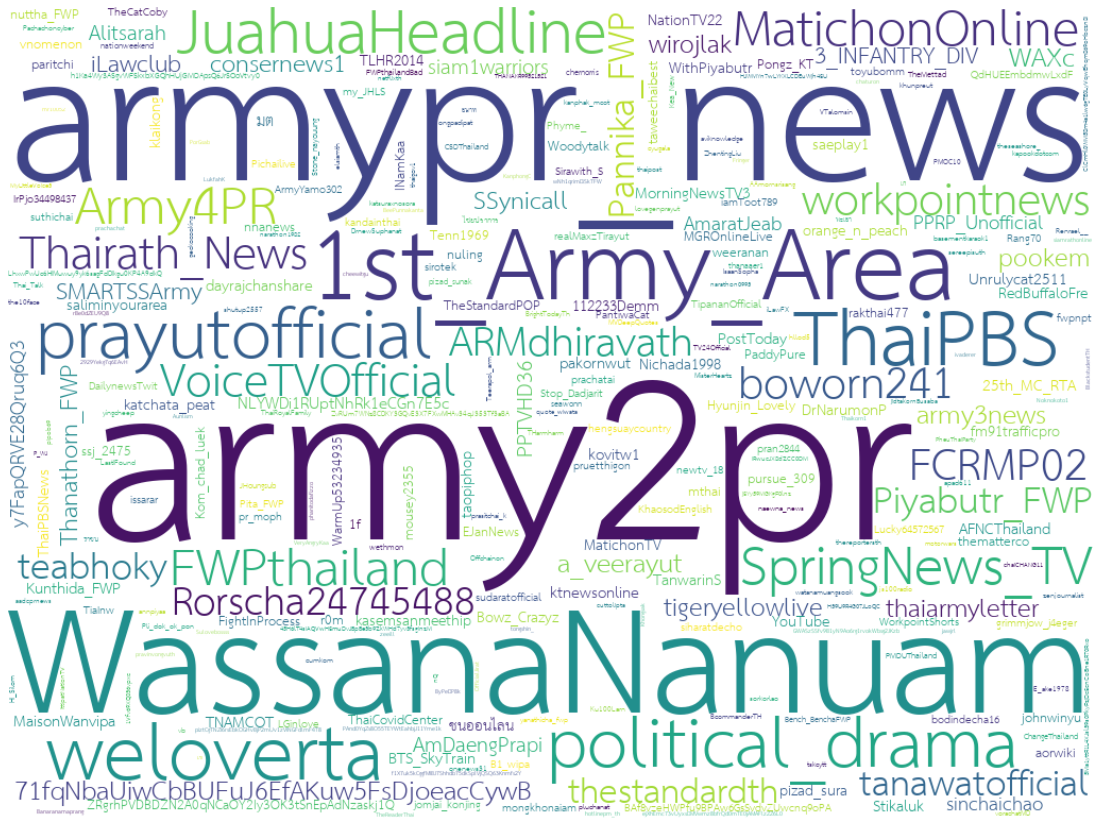

In [28]:
wordcloud_mention = WordCloud(font_path=front,
                      stopwords = '\'',
                      max_words=300,
                      contour_width=1,
                      background_color="white",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(mention))



def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_mention)

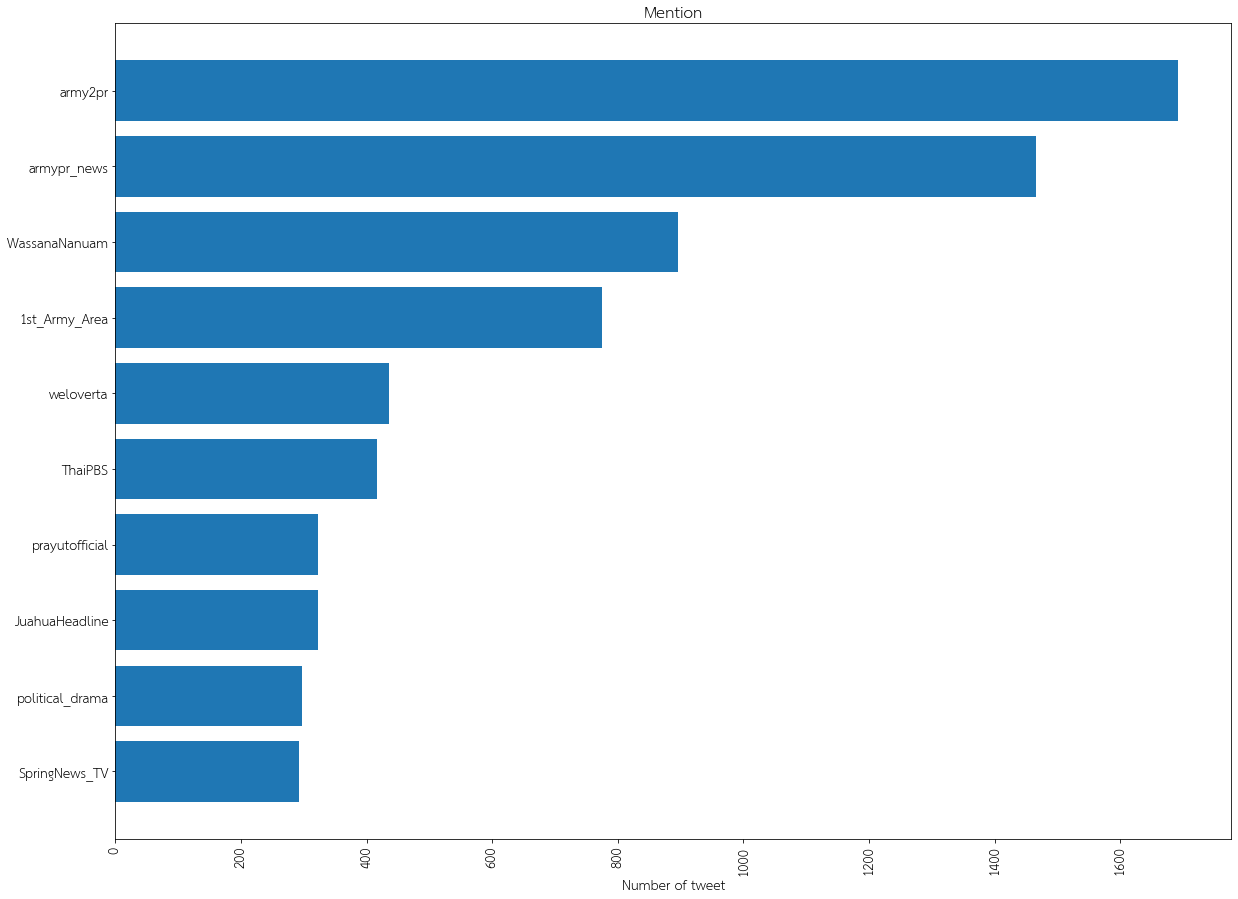

In [55]:
mention_count = mention.value_counts()

mention_word_count = pd.DataFrame(data = mention_count)
mention_top = mention_word_count.iloc[:10].sort_values(by='mention')

plt.figure(figsize=(20,15))
plt.barh(mention_top.index, mention_top.mention)
plt.title('Mention')
plt.xlabel('Number of tweet')
plt.xticks(rotation='vertical')
plt.show()


## Hashtag

In [31]:
hashtags = IO_tweet[IO_tweet['hashtags'] != r'[]']['hashtags']
hashtags = [re.sub('[\[\]\']', '', txt) for txt in hashtags]

hashtags[:15]

['ทํางานวนไป, อนาคตใหม่',
 'กองทัพบกห่วงใยประชาชน, กองทัพบกเพื่อประชาชน',
 'พรรคอนาคตใหม่',
 'อนคตไหม้',
 'รักทหารไทย',
 'เนรคุณแผ่นดิน, ติ่งควายส้ม',
 'ทหารใหม่, น้องคนเล็ก, กองทัพบก, popapanda, letsgetit, ชีวิตติดใบแดง, CDGT, cdguntee',
 'saoalicization',
 'อิช่อ, อนาคตดับ',
 'กองทัพบกห่วงใยประชาชน',
 'พรรคอนาคตไหม้',
 'กองทัพบก',
 'ทรงพระเจริญ',
 'ธนาธรจึงรุ่งเรืองกิจ',
 'ประชาธิปไตยจอมปลอม, ความเน่าเหม็นในอนาคตใหม่']

In [32]:
hashtags_cut = [word_tokenize(txt,engine='newmm') for txt in hashtags]
hashtags_j = [''.join(txt) for txt in hashtags_cut]


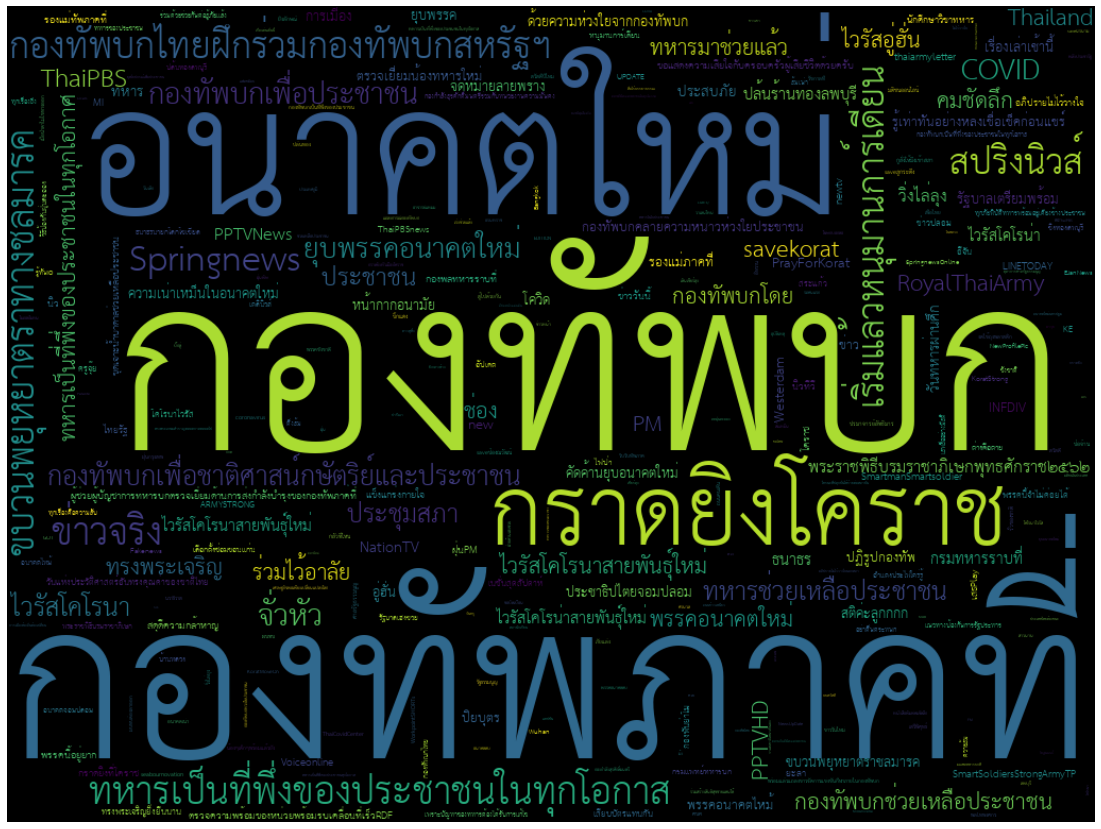

In [33]:
wordcloud_hashtags = WordCloud(font_path=front,
                      stopwords = th_stop,
                      max_words=300,
                      contour_width=3,
                      contour_color='darkgreen',
                      background_color="black",
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(hashtags_j))



def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_hashtags)

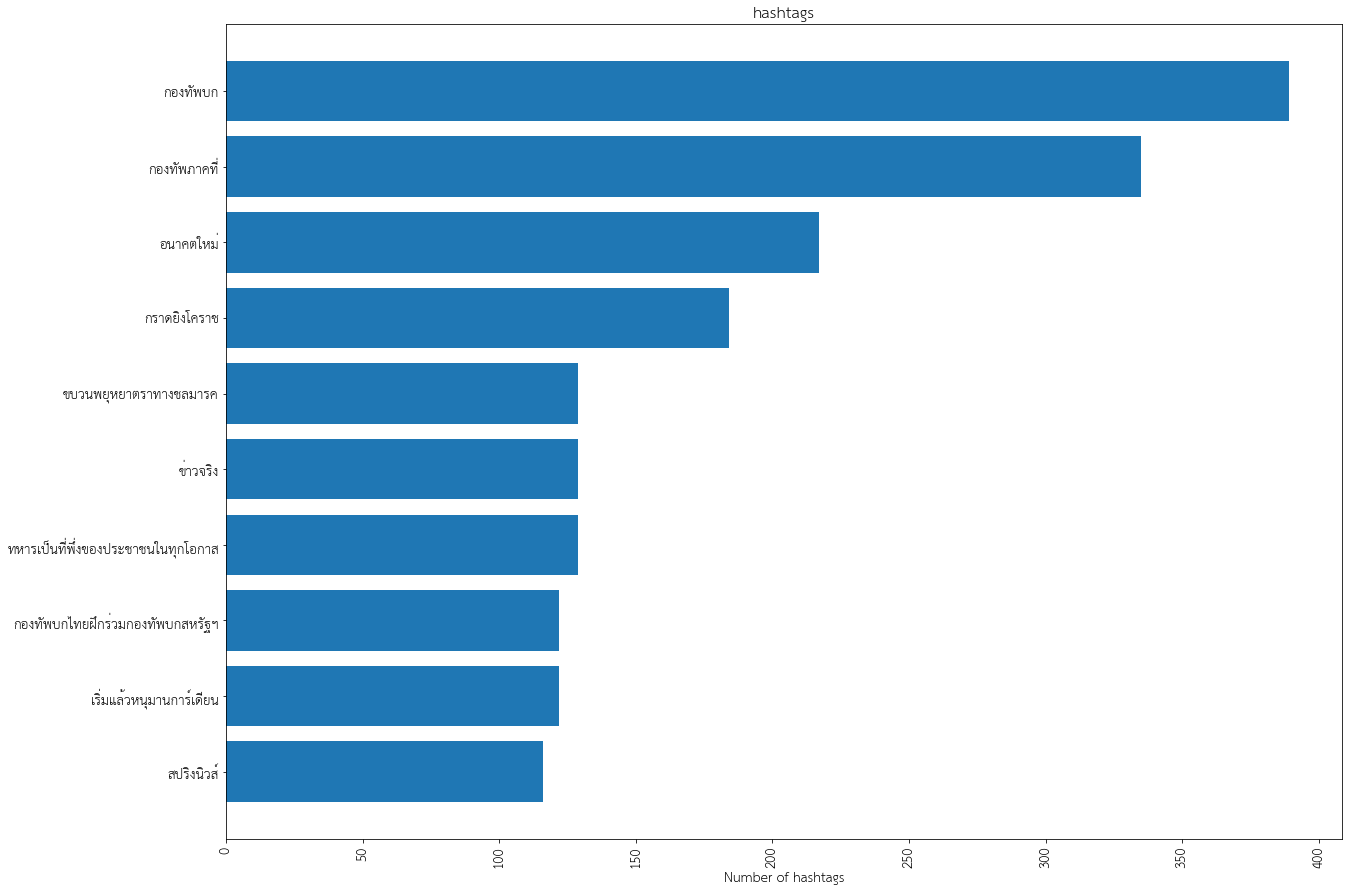

In [56]:
wordcloud_hashtags_count = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="black",
                      colormap='Set2',
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).process_text(' '.join(hashtags_j))

hashtags_word_count = pd.DataFrame(data = wordcloud_hashtags_count.items(), columns=['Word', 'Count'])
hashtags_word_count = hashtags_word_count.sort_values(by='Count', ascending=False)
hashtags_top = hashtags_word_count.iloc[:10].sort_values(by='Count')

plt.figure(figsize=(20,15))
plt.barh(hashtags_top.Word, hashtags_top.Count)
plt.title('hashtags')
plt.xlabel('Number of hashtags')
plt.xticks(rotation='vertical')
plt.show()


## Tweet text

In [35]:

text_tweet = [','.join(txt) for txt in IO_tweet.tweet_text]

In [36]:
def cleaner(tweet):
    tweet = re.sub("\s([@#][\w_-]+)","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = re.sub("[RT]", "", tweet) #Remove http links
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    return tweet


th_stop = tuple(thai_stopwords())
def split_word_rnn(text):
            
    tokens = word_tokenize(text,engine='newmm')
    
    tokens = [i for i in tokens if not i in th_stop]

    tokens = [i for i in tokens if not i.isnumeric()]

    return tokens

In [37]:
IO_tweet['tweet_text_clean'] = IO_tweet['tweet_text'].map(lambda x: cleaner(x))
tokens_tweet = split_word_rnn(' '.join(IO_tweet['tweet_text_clean']))

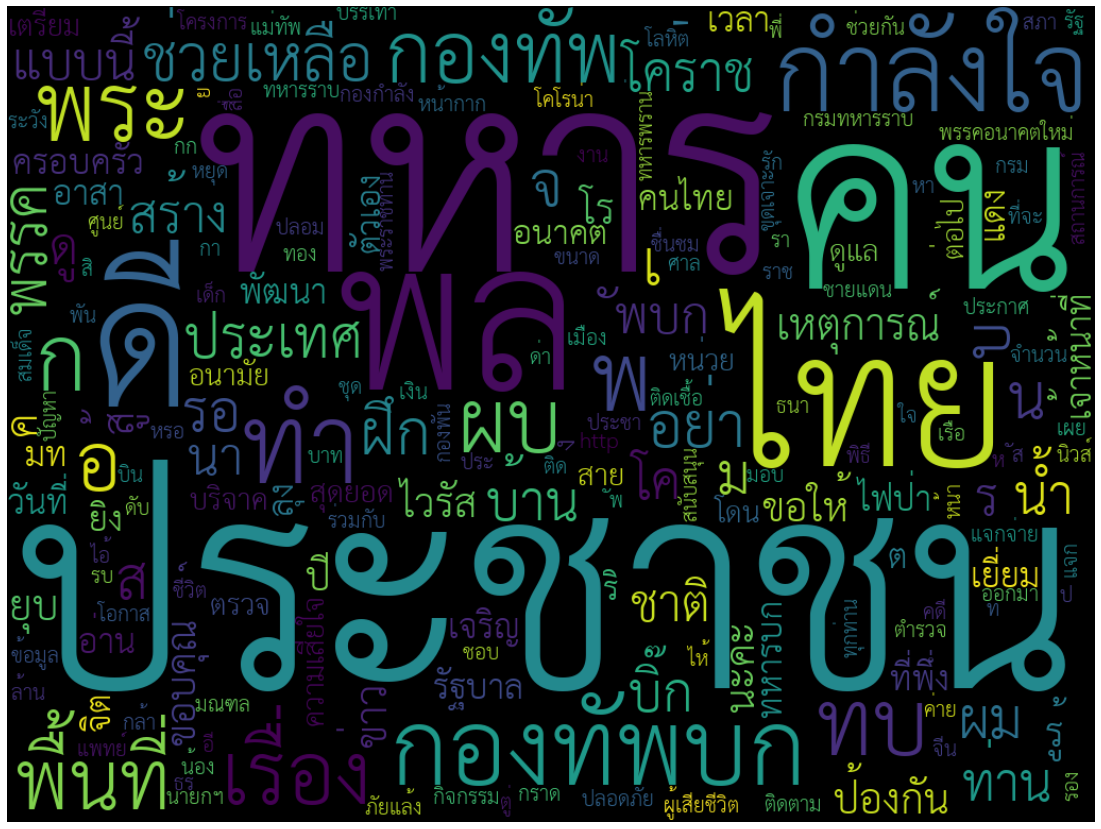

In [38]:
wordcloud_text = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="black",

                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).generate(' '.join(tokens_tweet))

def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_text)


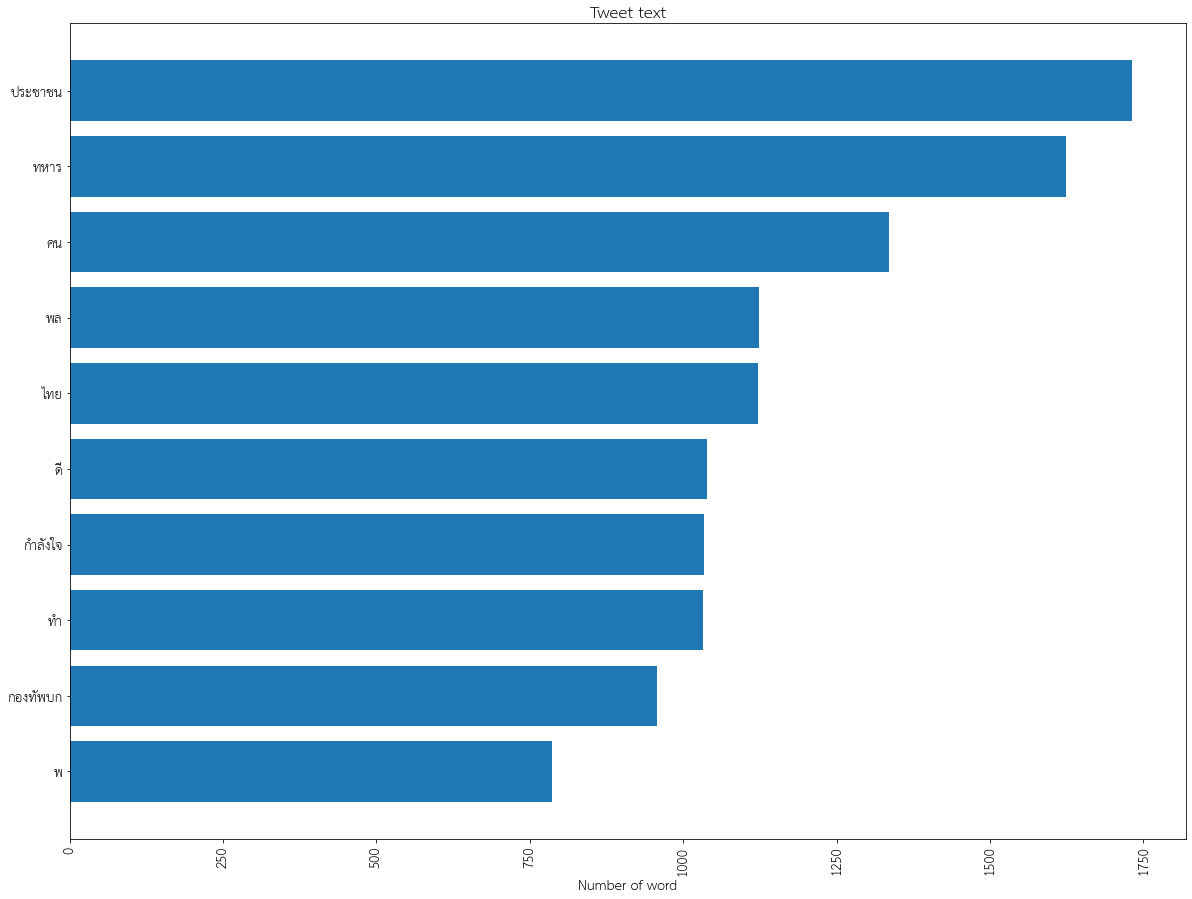

In [60]:
wordcloud_tweet_count = WordCloud(font_path=front,
                      stopwords = th_stop,
                      min_font_size = 10,
                      background_color="black",
                      colormap='Set2',
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      width=1024, 
                      height=768,
                      collocations=False,
                      ).process_text(' '.join(tokens_tweet))

tweet_word_count = pd.DataFrame(data = wordcloud_tweet_count.items(), columns=['Word', 'Count'])
tweet_word_count = tweet_word_count.sort_values(by='Count', ascending=False)
tweet_word_count = tweet_word_count.iloc[:10].sort_values(by='Count')

plt.figure(figsize=(20,15))
plt.barh(tweet_word_count.Word, tweet_word_count.Count)
plt.title('Tweet text')
plt.xlabel('Number of word')
plt.xticks(rotation='vertical')
plt.show()
